In [67]:
import random

def generate_random_state(n):
  """
    initialzes an array of random integers. Where each number specifies the cloumn location of a queen and the index is the row, since I know only one queen can be in one column I used the special case.
    Special case:
        no random integer are the same
    Args:
        n: size of the array
    Returns:
        array: the array generated
  """
  arr = []
  i =0
  while i < n:
    random_digit = random.randint(0, n-1)
    if(random_digit not in arr):
      arr.append(random_digit)
      i= i+1
  return arr


def calculate_utility(state):
  """
  Calculates the number of attacking pairs.
  if the queens are placed on the same column or the queens are in the same diagonal they are attacking.
  best utility is a value of 0

  Args:
      state: the current state which is an array of the queens on a particular column
  Returns:
      pairs: the total pairs of attacking queens

  """
  utility = 0
  for i in range(len(state)):
    for j in range(i + 1, len(state)):
      if state[i] == state[j] or abs(state[i] - state[j]) == abs(i - j):
        utility += 1
  return utility

def hill_climbing(n, climbers):
  """
  This function first generates a random initial state and calculates the utility, i.e attacking pairs of queens. The lower the utility the better

  Args:
      n: the number of queens to be placed in an nxn board
  Returns:
      solution: the solution or best possible solution when stuck on a local minimum
      utility_value = the utility value of the solution returned

  """
  best_solution = None
  lowest_utility_value_found = float('inf')

  for i in range(climbers):


    current_state = generate_random_state(n)
    current_utility_value = calculate_utility(current_state)

    while current_utility_value > 0:
      neighbors = []
      for queenCol in range(len(current_state)):
        for potentialPosition in range(n):
          # ensuring the agent can move a maximum of 2 tiles at a time
          if abs(current_state[queenCol] - potentialPosition) <=2 and (current_state[queenCol] != potentialPosition):
            next_state = list(current_state)
            next_state[queenCol] = potentialPosition
            neighbors.append(next_state)

      best_next_state = None
      best_utility_value = current_utility_value

      for state in neighbors:
        attacking_pairs = calculate_utility(state)
        if attacking_pairs < best_utility_value:
          best_next_state = state
          best_utility_value = attacking_pairs

      if best_utility_value >= current_utility_value:
        break  # Local minimum or plateau reached
      else:
        current_state = best_next_state
        current_utility_value = best_utility_value

    if current_utility_value < lowest_utility_value_found:
      lowest_utility_value_found = current_utility_value
      best_solution = current_state

    if lowest_utility_value_found == 0:
      break  # Found the optimal solution

  return best_solution, lowest_utility_value_found

In [68]:
# Q1 using 8 queens and 4 parallel climbers
n=8
climbers = 4
solution, utility_value = hill_climbing(n,climbers)
if utility_value == 0:
  print("Solution found:", solution)
else:
    print("Local minimum reached with", utility_value, "attacking pairs:", solution)

Local minimum reached with 2 attacking pairs: [6, 0, 7, 5, 1, 2, 4, 3]


In [69]:
# Q1 using 16 queens and 4 parallel climbers
n=16
climbers = 4
solution, utility_value = hill_climbing(n,climbers)
if utility_value == 0:
  print("Solution found:", solution)
else:
    print("Local minimum reached with", utility_value, "attacking pairs:", solution)

Local minimum reached with 4 attacking pairs: [5, 8, 4, 12, 15, 0, 2, 13, 11, 7, 10, 1, 9, 14, 8, 3]


# Q2 A* Search


In [70]:
from PIL import Image, ImageDraw

def draw_maze(maze, start, goal, path=None, padding=10, size=10):
  cell_size = size # Adjust cell size for better visualization
  maze_width = len(maze[0])
  maze_height = len(maze)
  # print(maze_width, maze_height )

  # Calculate minimum image size with padding
  min_image_width = (maze_width * cell_size)
  min_image_height = (maze_height * cell_size)

  # Ensure the goal node is within the maze boundaries
  goal.x = min(max(goal.x, 0), maze_width - 1)
  goal.y = min(max(goal.y, 0), maze_height - 1)

  # Calculate goal position and adjust image size if necessary
  goal_x, goal_y = goal.x * cell_size + padding, goal.y * cell_size + padding
  image_width = max(min_image_width, goal_x + cell_size + padding)
  image_height = max(min_image_height, goal_y + cell_size + padding)

  image = Image.new("RGB", (image_width, image_height), color="white")
  draw = ImageDraw.Draw(image)

  # Draw maze walls, boundaries, and soft walls
  for y in range(maze_height):
    for x in range(maze_width):
      if maze[y][x] == 1:
        draw.rectangle([(x * cell_size) + padding, (y * cell_size) + padding,
        ((x + 1) * cell_size) + padding, ((y + 1) * cell_size) + padding],
        fill="black")


      elif maze[y][x] == 2: # Soft walls
        draw.rectangle([(x * cell_size) + padding, (y * cell_size) + padding,
        ((x + 1) * cell_size) + padding, ((y + 1) * cell_size) + padding],
        fill="gray")


  # Draw start node (red)
  draw.rectangle([(start.x * cell_size) + padding, (start.y * cell_size) + padding,
  ((start.x + 1) * cell_size) + padding, ((start.y + 1) * cell_size) + padding],
  fill="red")


  # Draw goal node (blue)
  draw.rectangle([goal_x, goal_y,
  goal_x + cell_size, goal_y + cell_size],
  fill="blue")
  # Draw path

  if path:
    for i in range(len(path) - 1):
      x1 = path[i][0] * cell_size + cell_size // 2 + padding
      y1 = path[i][1] * cell_size + cell_size // 2 + padding
      x2 = path[i + 1][0] * cell_size + cell_size // 2 + padding
      y2 = path[i + 1][1] * cell_size + cell_size // 2 + padding
      draw.line((x1, y1, x2, y2), fill="green", width=2)
  return image


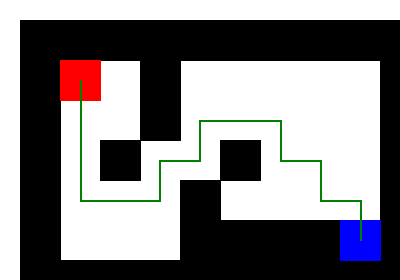

In [77]:
import math
import heapq

maze =  [
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 1, 0, 0, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

class Node:
  def __init__(self, x , y):
    self.x = x
    self.y = y
    self.h = self.distance()
    # self.g = abs(x - 1) + abs(y -1)
    self.g = float('inf')
    self.child =[]

  def distance(self):
    return math.sqrt((self.x- 5) ** 2 + (self.y-8) ** 2)

  def add_neighbor(self, node_child):
    self.child.append(node_child)

  # def calculate_f_value(self):
  #   return self.g + self.h

  def __str__(self):
    return f"({self.x}, {self.y})"

  def print_child_nodes(self):
    for node in self.child:
      print(f"({node.x}, {node.y})", end=" --> ")

  def __lt__(self, other):
    """
    Define how to compare two Node objects.
    Nodes are compared based on their heuristic value (h).
    """
    return self.h < other.h


def calculate_f_value(node):
  return node.g + node.h


graph = {}

# Iterate through the grid
for i in range(len(maze)):
  for j in range(len(maze[0])):
    if maze[i][j] == 0:
      node = Node(i, j)
      graph[(i, j)] = node

for node_pos, node in graph.items():
  x, y = node_pos
  # Check neighboring positions
  for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
    nx, ny = x + dx, y + dy
    if (nx, ny) in graph:
      neighbor_node = graph[(nx, ny)]
      node.add_neighbor(neighbor_node)

def astar_search(start, goal):
  open_set = []  # Priority queue of nodes to be evaluated
  start.g = 0  # Cost from start node to itself is 0
  heapq.heappush(open_set, (start.h, start))  # Push start node with f-value to open set
  came_from = {}  # Keep track of parent nodes

  while open_set:

    _, current_node = heapq.heappop(open_set)

    if current_node == goal:
      path = []
      while current_node in came_from:
        path.append(current_node)
        current_node = came_from[current_node]
      path.append(start)
      return path[::-1]

    for neighbor in current_node.child:
      tentative_g = current_node.g + 1
      if tentative_g < neighbor.g:
        neighbor.g = tentative_g
        came_from[neighbor] = current_node
        heapq.heappush(open_set, (calculate_f_value(neighbor), neighbor))

  return None  # No path found


start = graph[(1,1)]
goal = graph[(5,8)]
path = astar_search(start, goal)

class SGNode:
  def __init__(self, x , y):
    self.x = x
    self.y = y

directions = []
for node in path:
  directions.append([node.y,node.x])
image = draw_maze(maze, SGNode(1,1), SGNode(8,5), directions, padding=20, size = 40)
display(image)

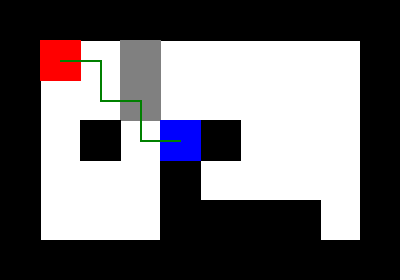

In [72]:
maze2 =  [ [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
[1, 0, 0, 2, 0, 0, 0, 0, 0, 1],
[1, 0, 0, 2, 0, 0, 0, 0, 0, 1],
[1, 0, 1, 0, 0, 1, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 0, 0, 0, 0, 1],
[1, 0, 0, 0, 1, 1, 1, 1, 0, 1],
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]

class Nodetwo:
  def __init__(self, x , y, softwall):
    self.x = x
    self.softwall = softwall
    self.y = y
    self.h = self.distance()
    # self.g = abs(x - 1) + abs(y -1)
    self.g = float('inf')
    self.child =[]


  def distance(self):
    heuristic = math.sqrt((self.x- 3) ** 2 + (self.y-4) ** 2)
    if(self.softwall):
      heuristic = heuristic * 1.5
    return heuristic

  def add_neighbor(self, node_child):
    self.child.append(node_child)

  def __str__(self):
    return f"({self.x}, {self.y})"

  def print_child_nodes(self):
    for node in self.child:
      print(f"({node.x}, {node.y})", end=" --> ")

  def __lt__(self, other):
    """
    Define how to compare two Node objects.
    Nodes are compared based on their heuristic value (h).
    """
    return self.h < other.h


def calculate_f_value(node):
  return node.g + node.h

graphTwo = {}

# Iterate through the grid
for i in range(len(maze2)):
  for j in range(len(maze2[0])):
    if maze2[i][j] == 0:
      node = Nodetwo(i, j, False)
      graphTwo[(i, j)] = node
    if maze2[i][j] == 2:
      node = Nodetwo(i, j, True)
      graphTwo[(i, j)] = node


for node_pos, node in graphTwo.items():
  x, y = node_pos
  # Check neighboring positions
  for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
    nx, ny = x + dx, y + dy
    if (nx, ny) in graphTwo:
      neighbor_node = graphTwo[(nx, ny)]
      node.add_neighbor(neighbor_node)

def astar_search2(start, goal):
  open_set = []  # Priority queue of nodes to be evaluated
  start.g = 0  # Cost from start node to itself is 0
  heapq.heappush(open_set, (start.h, start))  # Push start node with f-value to open set
  came_from = {}  # Keep track of parent nodes

  while open_set:

    _, current_node = heapq.heappop(open_set)

    if current_node == goal:
      path = []
      while current_node in came_from:
        path.append(current_node)
        current_node = came_from[current_node]
      path.append(start)
      return path[::-1]

    for neighbor in current_node.child:
      tentative_g = current_node.g + 1
      if tentative_g < neighbor.g:
        neighbor.g = tentative_g
        came_from[neighbor] = current_node
        heapq.heappush(open_set, (calculate_f_value(neighbor), neighbor))

  return None  # No path found


start = graphTwo[(1,1)]
goal = graphTwo[(3,4)]
path = astar_search2(start, goal)

# print(path)

class SGNode:
  def __init__(self, x , y):
    self.x = x
    self.y = y

directions = []
for node in path:
  directions.append([node.y,node.x])
imagetwo = draw_maze(maze2, SGNode(1,1), SGNode(4,3), directions, padding=0, size = 40)
display(imagetwo)

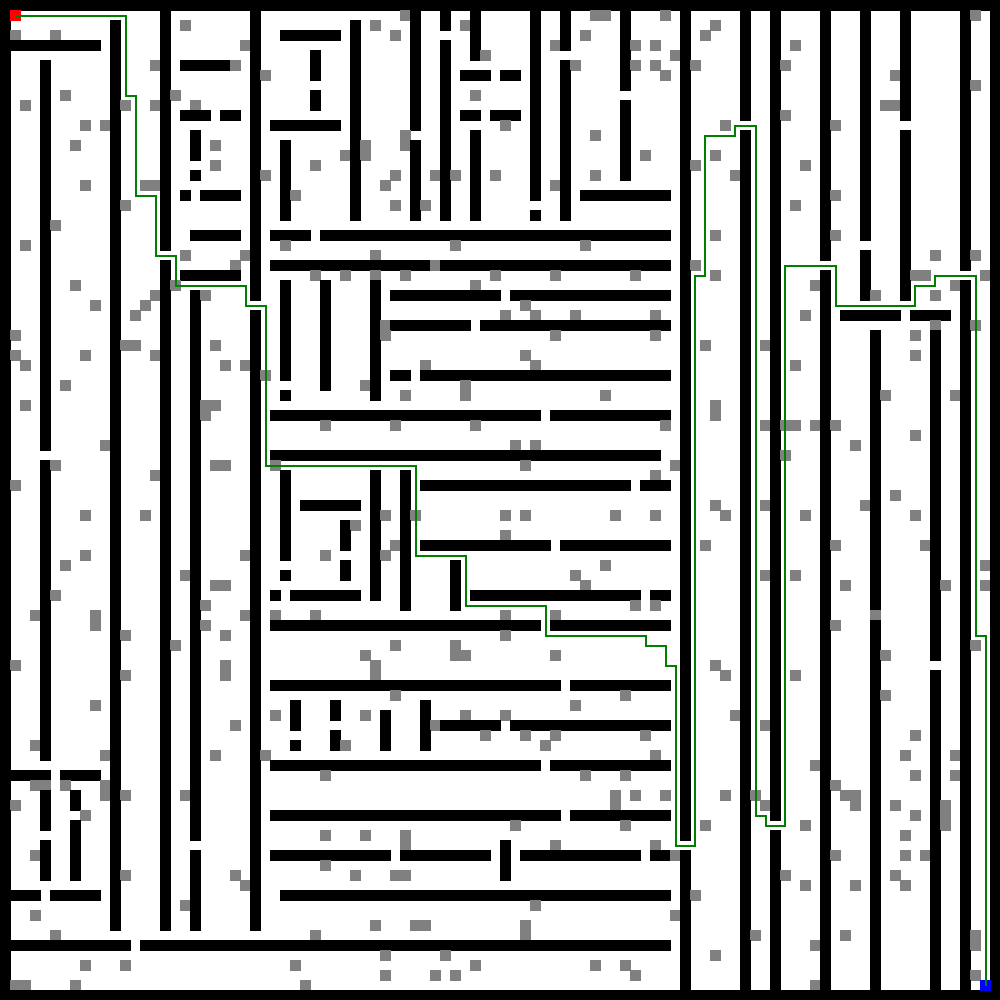

In [73]:
maze3 = []

arr = []
with open('maze.txt', 'r') as file:
  parentbracket = 0;
  bracket = False
  while True:
    char = file.read(1)
    if(char == '[' and parentbracket == 0 ):
      parentbracket = parentbracket + 1
      continue
    if(char == '[' and parentbracket ==1 ):
      bracket = True
      continue
    if(bracket and char != ']' and char !=' ' and char!=','):
      arr.append(int(char))
      continue
    if(bracket and char == ']'):
      bracket = False
      maze3.append(arr)
      arr =[]

    if not char:
      break



graphthree = {}

# Iterate through the grid
for i in range(len(maze3)):
  for j in range(len(maze3[0])):
    if maze3[i][j] == 0:
      node = Nodetwo(i, j, False)
      graphthree[(i, j)] = node
    if maze3[i][j] == 2:
      node = Nodetwo(i, j, True)
      graphthree[(i, j)] = node


for node_pos, node in graphthree.items():
  x, y = node_pos
  # Check neighboring positions
  for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
    nx, ny = x + dx, y + dy
    if (nx, ny) in graphthree:
      neighbor_node = graphthree[(nx, ny)]
      node.add_neighbor(neighbor_node)

# print(len(maze3[0]))
start = graphthree[(1,1)]
goal = graphthree[(98,98)]
paththree = astar_search2(start, goal)

# print(paththree)

class SGNode:
  def __init__(self, x , y):
    self.x = x
    self.y = y
directions = []
for node in paththree:
  directions.append([node.y,node.x])
imagethree = draw_maze(maze3, SGNode(1,1), SGNode(98,98), directions, padding=0, size = 10)
display(imagethree)

# Q4  Consider the graph with 8 nodes A1, A2, A3, A4, H, T, F1, F2. Ai is connected to Ai+1 for all i, each Ai is connected to H, H is connected to T, and T is connected to each Fi. Find a 3-coloring of this graph

In [74]:
def is_safe(node, color, graph, color_map):
  for neighbor in graph[node]:
    if color_map.get(neighbor) == color:
      return False
  return True

def dfs(graph, node):
  """
  Implemented DFS backtracking algorithm to color all the node such that  no 2 adjacent nodes have the same color
  """

  visitied.add(node)

  if(node not in graph):
    return
  if(len(color_map) == 8):
    return color_map

  for color in colors:
    if is_safe(node, color, graph, color_map):
      color_map[node] = color
      next_nodes = graph[node]
      for next_node in graph[node]:
        if(next_node not in visitied):
          dfs(graph, next_node)
    else:
      # main difference between dfs and bfs
      # if it is not a safe color to assign we return continue with the same node but try another color
      continue

graph = {
  "A1": ["A2", "H"],
  "A2": ["A1","A3", "H"],
  "A3": ["A2","A4", "H"],
  "A4": ["A3", "H"],
  "H": ["T", "A1","A2", "A3", "A4" ],
  "T": ["F1", "F2", "H"],
  "F1": ["T"],
  "F2": ["T"]
}
visitied = set()
colors = ['Red', 'Green', 'Blue']
color_map = {}
dfs(graph, 'A1')
print(color_map)

{'A1': 'Red', 'A2': 'Green', 'A3': 'Red', 'A4': 'Green', 'H': 'Blue', 'T': 'Green', 'F1': 'Blue', 'F2': 'Blue'}


In [78]:
def is_safe(node, color, graph, color_map):
  for neighbor in graph[node]:
    if color_map.get(neighbor) == color:
      return False
  return True

def bfs(graph, node):

  """
  Implemented BFS backtracking algorithm to color all the node such that  no 2 adjacent nodes have the same color
  """

  visitied.add(node)

  if(node not in graph):
    return
  if(len(color_map) == 8):
    return color_map

  for color in colors:
    if is_safe(node, color, graph, color_map):
      color_map[node] = color
      next_nodes = graph[node]
      for next_node in graph[node]:
        if(next_node not in visitied):
          dfs(graph, next_node)
    else:
      # main difference between dfs and bfs
      # if it is not a safe color to assign we return back and expand the other nodes in the parent Node
      return

graph = {
  "A1": ["A2", "H"],
  "A2": ["A1","A3", "H"],
  "A3": ["A2","A4", "H"],
  "A4": ["A3", "H"],
  "H": ["T", "A1","A2", "A3", "A4" ],
  "T": ["F1", "F2", "H"],
  "F1": ["T"],
  "F2": ["T"]
}
visitied = set()
colors = ['Red', 'Green', 'Blue']
color_map = {}
bfs(graph, 'A1')
print(color_map)

{'A1': 'Red', 'A2': 'Green', 'A3': 'Red', 'A4': 'Green', 'H': 'Blue', 'T': 'Green', 'F1': 'Blue', 'F2': 'Blue'}
